In [1]:
import sys
sys.path.append('../')

import gym
from IPython import display
import matplotlib.pyplot as plt
import numpy as np


from base import agent_base

In [2]:
env = gym.make('CartPole-v1')
agent = agent_base.RandomAgent(env, gamma=0.9)

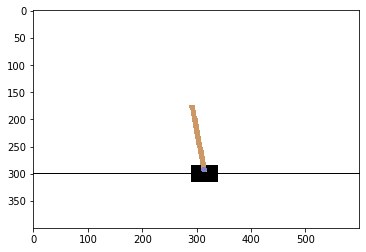

In [3]:
obs = env.reset()

img = plt.imshow(env.render(mode="rgb_array"))  # only call this once
for i in range(300):
    img.set_data(env.render(mode="rgb_array"))  # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)

    action = agent(obs)
    obs, rew, done, info = env.step(action)

    if done:
        break